In [1]:
## Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
##Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


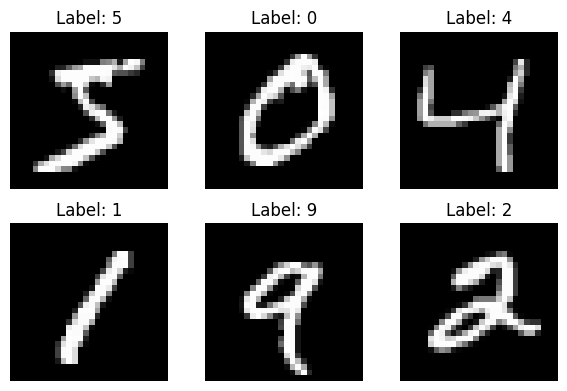

In [3]:
##Visualize a few digits
plt.figure(figsize=(6,4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
##Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
##Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
##Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.7987 - loss: 0.6469 - val_accuracy: 0.9775 - val_loss: 0.0757
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.9694 - loss: 0.1008 - val_accuracy: 0.9848 - val_loss: 0.0544
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - accuracy: 0.9768 - loss: 0.0708 - val_accuracy: 0.9862 - val_loss: 0.0460
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9812 - loss: 0.0588 - val_accuracy: 0.9865 - val_loss: 0.0487
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9909 - val_loss: 0.0324


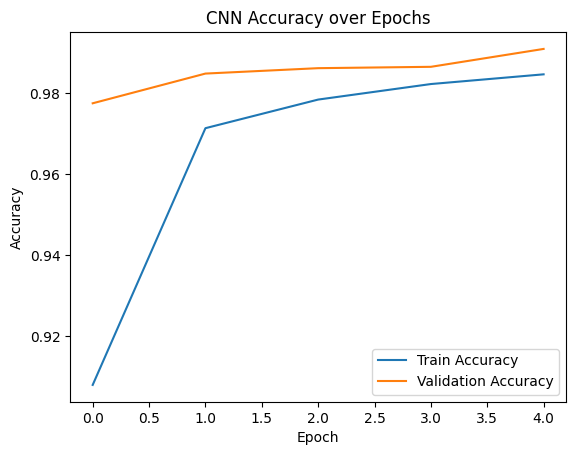

In [7]:
##Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# 📈 Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
##Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9876 - loss: 0.0332
Test Accuracy: 0.9898


 Visualizing Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


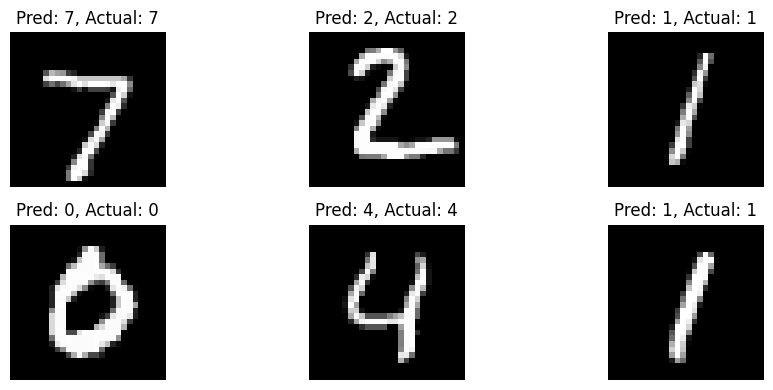

In [9]:
# Predict first 6 test samples
predictions = model.predict(x_test[:6])

# Display predictions vs actual labels
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(y_test[i])
    plt.title(f"Pred: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
